In [1]:
import numpy as np
import matplotlib.pyplot as plt
import random
import math


In [23]:
N = 20 #Number of colonies
Adot = 1  #Time derivative of Area
T = 100  #Max time of evolution
L = 12
#Length of the square box
dr = L/300  #Rate of change in redius
a = 4 #Determines the number of directions that the colonies expand to
dmin = 0.1  #Distance that is considered too close to be able to grow further

## Ordered

In [822]:
x0,y0 = np.zeros(N),np.zeros(N)

In [834]:
d = np.linspace(0.2*np.pi,2*np.pi,20)
d

array([0.62831853, 0.9259431 , 1.22356767, 1.52119223, 1.8188168 ,
       2.11644137, 2.41406593, 2.7116905 , 3.00931507, 3.30693964,
       3.6045642 , 3.90218877, 4.19981334, 4.4974379 , 4.79506247,
       5.09268704, 5.39031161, 5.68793617, 5.98556074, 6.28318531])

In [850]:
# d = np.linspace(0.2*np.pi,2*np.pi+0.001,20)
d = np.linspace(0.3141592653589793,2*np.pi+0.001,20)

d = list(d)

center = 6

for i in range(len(d)):
  
    x0[i] = center+2*np.cos(d[i])
    y0[i] = center+2*np.sin(d[i])


## if you want to add more points inside the circle!

# d2 = np.linspace(0,2*np.pi,8)
# d2 = list(d2)

# center = 6

# for i in range(len(d2)):
  
#     x0[i+20] = center+0.5*np.cos(d2[i])
#     y0[i+20] = center+0.5*np.sin(d2[i])

## add the center as inoclation point
    
# x0[-1] = center
# y0[-1] = center

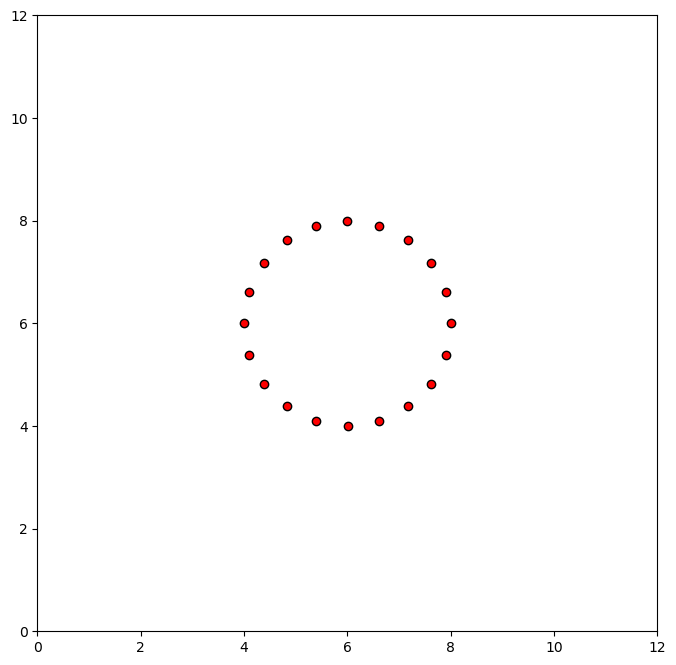

In [852]:
plt.figure(figsize=(8, 8))
plt.ylim(0,L)
plt.xlim(0,L)
plt.scatter(x0,y0,c="r",edgecolors="black")

## Disordered

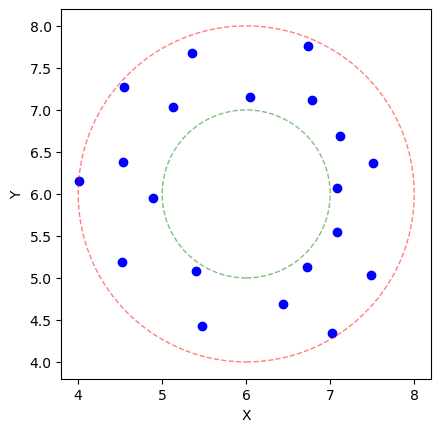

In [368]:
#Sampling random points

def sample_points_on_ring(outer_radius, inner_radius, num_points, min_distance, origin=(0, 0)):
    points = []
    ox, oy = origin  # Unpack origin coordinates

    while len(points) < num_points:
        angle = random.uniform(0, 2 * math.pi)  # Random angle
        r = random.uniform(inner_radius, outer_radius)  # Random radius
        x = r * math.cos(angle) + ox
        y = r * math.sin(angle) + oy

        # Check minimum distance constraint
        if all(math.sqrt((x - px)**2 + (y - py)**2) >= min_distance for px, py in points):
            points.append((x, y))

    return points

# Parameters
outer_radius = 2      # Outer boundary of the ring
inner_radius = 1      # Inner boundary (controls spread)
num_points = 20       # Number of points
min_distance = 0.5    # Minimum distance between points
origin = (6, 6)       # Center of the ring

# Generate points
sampled_points = sample_points_on_ring(outer_radius, inner_radius, num_points, min_distance, origin)

for i, (x, y) in enumerate(sampled_points):
    x0[i] = sampled_points[i][0]
    y0[i] = sampled_points[i][1]

# Plot the points
x_vals, y_vals = zip(*sampled_points)
plt.scatter(x_vals, y_vals, color="b")
plt.gca().set_aspect('equal')

# Draw reference circles for visualization
circle1 = plt.Circle(origin, outer_radius, color='r', fill=False, linestyle="--", alpha=0.5)
circle2 = plt.Circle(origin, inner_radius, color='g', fill=False, linestyle="--", alpha=0.5)
plt.gca().add_patch(circle1)
plt.gca().add_patch(circle2)


plt.xlabel("X")
plt.ylabel("Y")

plt.show()


In [411]:
order = [] 

for i in range(N):  #Each colony
        
    dx = center- x0[i]   # x relative to the center
    dy = center- y0[i]  # y relative to the center
    value = np.arctan2(dy, dx)  # Correctly compute angle
    
    value += np.pi # Shift negative angles to [0, 2π]
    order.append(value)


[2.4423247318666492,
 5.954007005360123,
 3.5133525616719306,
 2.4069234367646475,
 2.9417249042993987,
 0.8561451167793481,
 5.143137808753388,
 4.0002513818426495,
 1.9594137330369634,
 0.0034903538151560554,
 1.5944215761854723,
 3.083011885397209,
 5.489335162190323,
 3.756301608515783,
 4.380905059006571,
 1.2484895235104083,
 0.36138522676575,
 1.5652479617189052,
 4.492566318961288,
 4.797729400154476]

In [ ]:
#Save the generated random initial points

np.save("x0_random" , x0)
np.save("y0_random" , y0)

In [5]:
# Load them and use!

x0 = np.load("x0_random.npy")
y0 = np.load("y0_random.npy")

## Collision

In [35]:
center = 6 
radius = 8

def collision(x1,y1,x2,y2,i):  #(x1,y1) is a point and (x2,y2) are a set of points
    
    if np.sqrt((x1-center)**2+(y1-center)**2)>radius:
        return 0
    c = [n for n in range(N) if n!=i]  #For the clusters other than the one containing (x1,y1)
    for k in c:
        for j in range(len(x2[k])):
            if (x1 - x2[k][j])**2 + (y1 - y2[k][j])**2 < dmin*dmin:
                return 0
    return 1

In [25]:
x,y = [[x0[i]] for i in range(N)],[[y0[i]] for i in range(N)]

for t in range(1,80):  #Each time
    theta = 2*np.pi/(a*t)  #The angle between adjacent expand direction
    for i in range(N):  #Each colony
       
        for j in range(a*t):  #Each direction
            
            dx = center- x0[i]   # x relative to the center
            dy = center- y0[i]  # y relative to the center
            value = np.arctan2(dy, dx)  # Correctly compute angle
            
            value += np.pi # Shift negative angles to [0, 2π]
           
            p = x[i][0] + t*(dr)*np.cos(j*theta+value)
            q = y[i][0] + t*(dr)*np.sin(j*theta+value)
            if collision(p,q,x,y,i) == 1:
                x[i] += [p]
                y[i] += [q]
                

## Adding mutation  

In [872]:
x,y = [[x0[i]] for i in range(N)],[[y0[i]] for i in range(N)]

dr = [L/300 for i in range(N)]

for t in range(1,210):  #Each time
    theta = 2*np.pi/(a*t)  #The angle between adjacent expand direction
    for i in range(N):  #Each colony
        choose_to_mutate = random.uniform(0,1)  #At this step we decide to mutate or not 
        if choose_to_mutate <= 0.1: 
            bound = 0.0008
            nois = random.uniform(0, bound)
           
            dr[i] += nois 
                  
        for j in range(a*t):  #Each direction
            
            dx = center - x0[i]   # x relative to the center
            dy = center - y0[i]   # y relative to the center
            value = np.arctan2(dy, dx)  # Correctly compute angle
            
            value += np.pi              # Shift negative angles to [0, 2π]
           
            p = x[i][0] + t*(dr[i])*np.cos(j*theta+value)
            q = y[i][0] + t*(dr[i])*np.sin(j*theta+value)
            if collision(p,q,x,y,i) == 1:
                x[i] += [p]
                y[i] += [q]


## plot

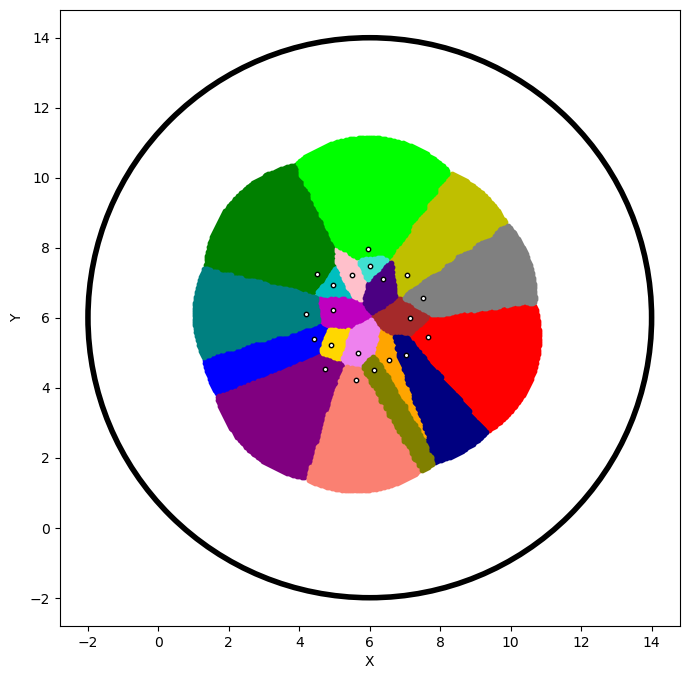

In [37]:
plt.figure(figsize=(8, 8))

colors = [
    "g", "r", "b", "c", "m", "y", "orange", "purple", "pink", "brown",
    "lime", "teal", "navy", "gold", "violet", "indigo", "gray", "turquoise", "salmon", "olive"
]


for i in range(N):
    
    # if i %2 == 0: 
    #     plt.scatter(x[i],y[i],s=10, c = "g", alpha = 1)
    # else: 
    plt.scatter(x[i],y[i],s=10 , c = colors[i], alpha = 1)
   
    
    plt.scatter(x[i][0],y[i][0],s=10,c="w",edgecolors="black")
circle=plt.Circle((center,center),radius, color='black', fill=False,linewidth=4)

ax = plt.gca()

plt.xlabel("X")
plt.ylabel("Y")



ax.add_patch(circle)
plt.savefig("Random_organization")


plt.show()

In [491]:
order,x0,y0 = zip(*sorted(zip(order, x0,y0)))

In [493]:
order,x0,y0 = (list(t) for t in zip(*sorted(zip(order,x0,y0))))

In [774]:
L/300

0.04

In [848]:
2*np.pi/20

0.3141592653589793